In [54]:
import pystare
import staremaster
import numpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs

proj = ccrs.PlateCarree()
transf = ccrs.Geodetic()

In [55]:
file_path2 = '../tests/data/mod05/MOD05_L2.A2005349.2125.061.2017294065400.hdf'
mod05 = staremaster.products.MOD05(file_path2)

In [83]:
lons = numpy.ascontiguousarray(mod05.lons.transpose())
lats = numpy.ascontiguousarray(mod05.lats.transpose())
            
sids = staremaster.conversions.latlon2stare(mod05.lats, 
                                            mod05.lons,                                             
                                            adapt_resolution=True)
sids = sids[0:5, 0:3] # Second dimension is scan direction
sids.flatten()

array([3461703427396677225, 3461638512807389609, 3461626395679801289,
       3461632857481321225, 3461637542474013417, 3461648304357686601,
       3461632856858481481, 3461638650379108137, 3461648369426287657,
       3465604486698573961, 3461644867569003273, 3461646397371336713,
       3465604119414802665, 3461644946455794121, 3461646393691692777])

In [84]:
srange = pystare.srange(sids.flatten())
indices = numpy.zeros([srange.get_size_as_values()], dtype=numpy.int64)
srange.copy_values(indices)

In [85]:
srange = pystare.srange(sids.flatten())
indices = numpy.zeros([srange.get_size_as_intervals()], dtype=numpy.int64)
srange.copy_intervals(indices)

In [86]:
indices = pystare.to_compressed_range(sids.flatten())

In [97]:
indices = pystare.expand_intervals(sids, resolution=9)
indices

array([3461632040145780745])

In [99]:
indices = pystare.intersect(indices.flatten(), sids.flatten())

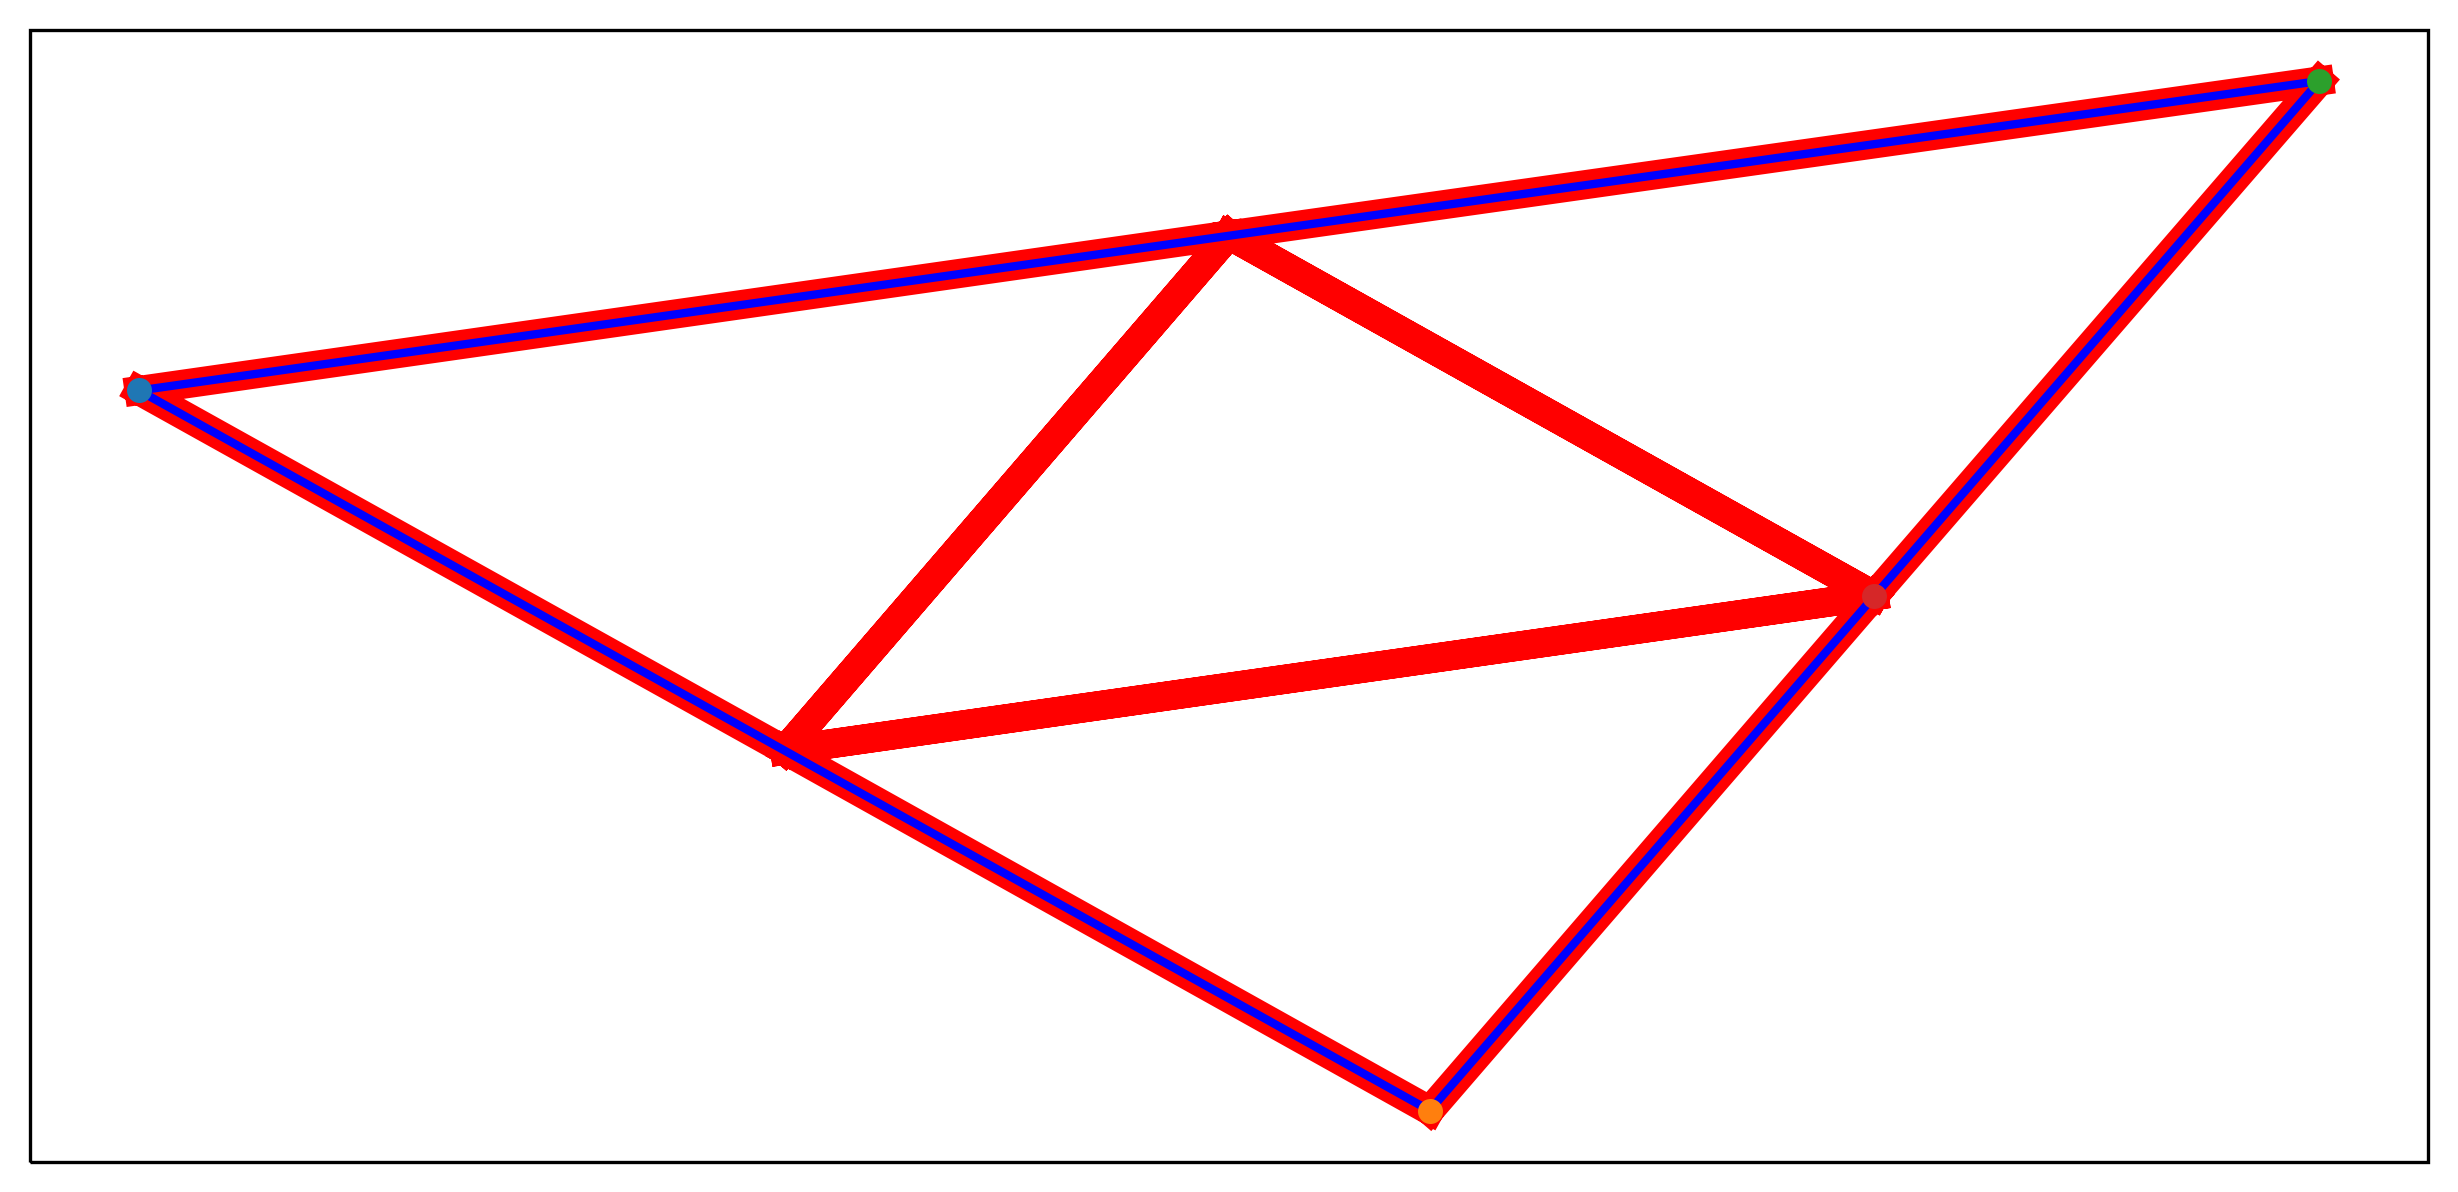

In [98]:
opts = {'projection':ccrs.PlateCarree(), 'transform':ccrs.Geodetic()}
fig, ax = plt.subplots(figsize=(13,5), dpi=300, subplot_kw=opts)
ax.coastlines()

lons, lats, intmat = pystare.triangulate_indices(sids.flatten())
triang = tri.Triangulation(lons, lats, intmat)
ax.triplot(triang, 'r-', transform=transf, lw=7, markersize=0)  

lons, lats, intmat = pystare.triangulate_indices(indices)
triang = tri.Triangulation(lons, lats, intmat)
ax.triplot(triang,'b-',transform=transf,lw=2, markersize=0)

latc, lonc = pystare.to_latlon(sids.flatten())
for lat, lon in zip(latc, lonc):
    ax.plot(lon, lat,transform=transf, marker='o', markersize=5)
    pass

In [92]:
sids = numpy.array([0x300a30000000000a, 0x300a30800000000a,
        0x300a31000000000a, 0x300a31800000000a])

In [77]:
earth = [0x0000000000000000, 0x0800000000000000, 0x1000000000000000, 
         0x1800000000000000, 0x2000000000000000, 0x2800000000000000,
         0x3000000000000000, 0x3800000000000000]

In [78]:
indices = pystare.intersect(earth, sids.flatten(), multiresolution=True)
indices

array([3461632040145780746, 3461632589901594634, 3461633139657408522,
       3461633689413222410])

In [45]:
lat = numpy.array([30,45,60], dtype=numpy.double)
lon = numpy.array([45,60,10], dtype=numpy.double)
indices1 = pystare.from_latlon(lat, lon, 6)
indices2 = numpy.array([indices1[1]], dtype=numpy.int64)
intersected = pystare.intersect(indices1, indices2, multiresolution=True)

In [100]:
indices

array([3461632040145780746, 3461632589901594634, 3461633139657408522,
       3461633689413222410])